### Import Libraries

In [ ]:
#Pretrained Model EfficientNetB1 without Top Layer
# !wget "https://storage.googleapis.com/keras-applications/efficientnetb1_notop.h5"

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2024-01-09 23:37:47--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.207, 142.251.161.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   192MB/s    in 0.4s    

2024-01-09 23:37:48 (192 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
import tensorflow as tf
import os
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam

----

### Create model

In [ ]:
#Use pretrained model as transfer learning layers
local_weight_file = local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#Adjust input shape and weights
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

In [ ]:
# Load the downloaded pre-trained weights
pre_trained_model.load_weights(local_weight_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
#Specify input layer model
last_layer = pre_trained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.MaxPooling2D()(last_output)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
# Add a dropout rate of 0.3
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Append the dense network to the base model
acneModel = Model(pre_trained_model.input, x)

# Print the model summary
acneModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [ ]:
#Compiled the model using adam optimizer and binary classification
acneModel.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import os
import shutil

# Set the base directory
base_dir = '/content/drive/MyDrive/acne_detection.v1i.tensorflow'

# Set the validation directory
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid')

# Create subdirectories for 'acne' and 'normal' within the validation directory
validation_acne_dir = os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_acne')
validation_normal_dir = os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_normal')

# Ensure the subdirectories exist; create them if not
os.makedirs(validation_acne_dir, exist_ok=True)
os.makedirs(validation_normal_dir, exist_ok=True)

# Move images to the respective subdirectories based on their class
# Replace 'acne2' and 'normal2' with the actual class subdirectories in your validation directory
acne_images = os.listdir(os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_acne'))
normal_images = os.listdir(os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_normal'))

for img in acne_images:
    src = os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_acne', img)
    dst = os.path.join(validation_acne_dir, img)
    shutil.move(src, dst)

for img in normal_images:
    src = os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_normal', img)
    dst = os.path.join(validation_normal_dir, img)
    shutil.move(src, dst)


In [ ]:
import os
import shutil

# Set the base directory
base_dir = '/content/drive/MyDrive/acne_detection.v1i.tensorflow'

# Set the validation directory
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne')

# Create subdirectories for 'acne' and 'normal' within the validation directory
train_acne_dir = os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne')
train_normal_dir = os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_normal')

# Ensure the subdirectories exist; create them if not
os.makedirs(validation_acne_dir, exist_ok=True)
os.makedirs(validation_normal_dir, exist_ok=True)

# Move images to the respective subdirectories based on their class
# Replace 'acne2' and 'normal2' with the actual class subdirectories in your validation directory
acne_images = os.listdir(os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne'))
normal_images = os.listdir(os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_normal'))

for img in acne_images:
    src = os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne', img)
    dst = os.path.join(train_acne_dir, img)
    shutil.move(src, dst)

for img in normal_images:
    src = os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_normal', img)
    dst = os.path.join(train_normal_dir, img)
    shutil.move(src, dst)



In [ ]:
base_dir = '/content/drive/MyDrive/acne_detection.v1i.tensorflow'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training acne pictures
train_acne_dir = os.path.join(train_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne/_annotations.csv')

# Directory with training normal pictures
train_normal_dir = os.path.join(train_dir, 'train_normal')

# Directory with validation acne pictures
validation_acne_dir = os.path.join(validation_dir, '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_acne/_annotations.csv')

# Directory with validation normal pictures
validation_normal_dir = os.path.join(validation_dir, 'valid_normal')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['train_acne', 'train_normal'],
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         classes=['valid_acne', 'valid_normal'],
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 1884 images belonging to 2 classes.
Found 1218 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Defining callback for preventing underfitting and overfitting
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and (logs.get('accuracy') > 0.99 or logs.get('accuracy') < 0.5):
            print("\nCancelling training")
            self.model.stop_training = True

In [ ]:
#Train the model
callbacks = myCallback()
history = acneModel.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 25,
            callbacks=[callbacks])

Epoch 1/25
40/95 [===========>..................] - ETA: 2:39 - loss: 0.6312 - accuracy: 0.6488

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 [==============================] - 617s 6s/step - loss: 0.5139 - accuracy: 0.7452 - val_loss: 0.2964 - val_accuracy: 0.8834
Epoch 2/25
95/95 [==============================] - 49s 520ms/step - loss: 0.3152 - accuracy: 0.8588 - val_loss: 0.2022 - val_accuracy: 0.9302
Epoch 3/25
95/95 [==============================] - 50s 528ms/step - loss: 0.2207 - accuracy: 0.9103 - val_loss: 0.0877 - val_accuracy: 0.9688
Epoch 4/25
95/95 [==============================] - 51s 543ms/step - loss: 0.1970 - accuracy: 0.9140 - val_loss: 0.1050 - val_accuracy: 0.9639
Epoch 5/25
95/95 [==============================] - 50s 528ms/step - loss: 0.1917 - accuracy: 0.9193 - val_loss: 0.0873 - val_accuracy: 0.9622
Epoch 6/25
95/95 [==============================] - 49s 516ms/step - loss: 0.1699 - accuracy: 0.9294 - val_loss: 0.0844 - val_accuracy: 0.9745
Epoch 7/25
95/95 [==============================] - 50s 528ms/step - loss: 0.1592 - accuracy: 0.9337 - val_loss: 0.0731 - val_accuracy: 0.9770
Epoch 8/25
9

----

### Visualizing Accuracy Plot

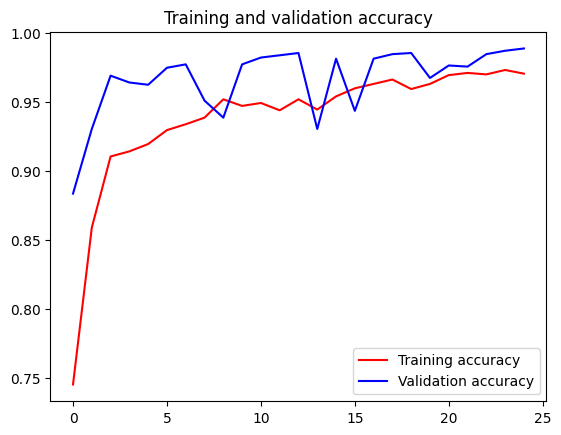

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

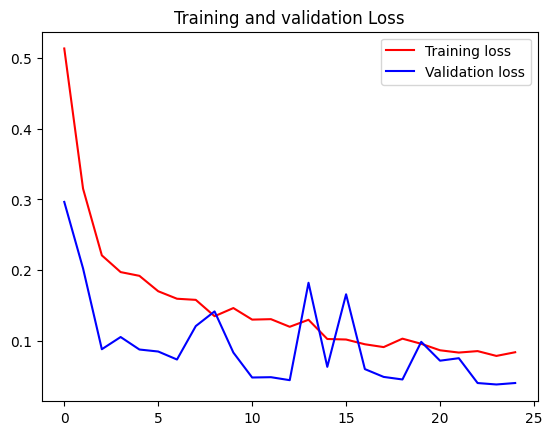

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

----

### Try Input Image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input


# Load the pre-trained model
model = load_model('/content/drive/MyDrive/acne_detection.v1i.tensorflow/Acne_model.h5')  # Replace with the actual path to your model file

# Load and preprocess the image
img_path = '/content/drive/MyDrive/acne_detection.v1i.tensorflow/valid/valid_acne/10-2-_jpg.rf.30793daa8e0590efc2777f61b52ce881.jpg'  # Replace with the actual path to your image file
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Preprocess the image for the InceptionV3 model


# Make predictions
predictions = model.predict(img_array)

# Interpret the results
if predictions[0, 0] > 0.5:
    print("No acne detected.")
else:
    print("acne detected.")


1/1 [==============================] - 2s 2s/step
acne detected.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.8 MB/s eta 0:00:00
1/1 [==============================] - 0s 279ms/step
Face Detected


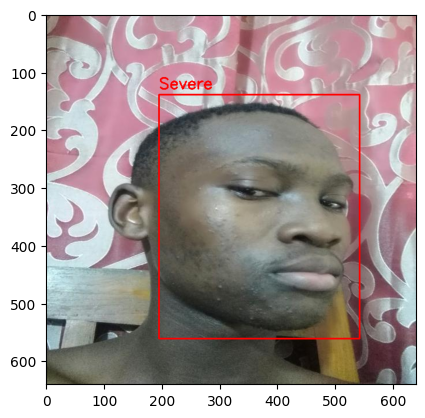

In [ ]:
!pip install mtcnn
import cv2
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

def detect_faces(image):
    detector = MTCNN()
    faces = detector.detect_faces(image)
    return faces

def analyze_skin(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is not None:
        # Detect faces in the image
        faces = detect_faces(image)

        # Check if a face is detected
        if faces:
            print("Face Detected")

            # Face detected, proceed with analyzing skin
            for face in faces:
                x, y, width, height = face['box']

                # Extract the region of interest (ROI) containing the face
                face_roi = image[y:y+height, x:x+width]

                # Perform acne severity estimation (replace this with your severity estimation logic)
                # For demonstration purposes, we assume severity levels based on face size
                severity = "Mild" if width < 100 else "Moderate" if width < 200 else "Severe"

                # Add severity text
                cv2.putText(image, severity, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

                # Draw a color-coded rectangle around the acne area
                color = (0, 255, 0)  # Green color
                if severity == "Moderate":
                    color = (0, 165, 255)  # Orange color
                elif severity == "Severe":
                    color = (0, 0, 255)  # Red color

                cv2.rectangle(image, (x, y), (x + width, y + height), color, 2)

            # Display the image with rectangles
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()

        else:
            print("No face Detected")
    else:
        print("Failed to load the image")

# Usage example
image_path = '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne/102-3-_jpg.rf.a1dccb2d8bf0a416e6e273a1ca5a90e9.jpg'
analyze_skin(image_path)


1/1 [==============================] - 0s 142ms/step
Face Detected
Severity Level: Mild
Mild acne usually consists of blackheads and whiteheads. Here are some general recommendations:
Recommendations:
- Use a gentle cleanser to wash your face twice a day.
- Apply over-the-counter topical treatments with ingredients like benzoyl peroxide or salicylic acid.
- Keep your skin moisturized with a non-comedogenic moisturizer.
- Avoid picking or squeezing pimples to prevent scarring.


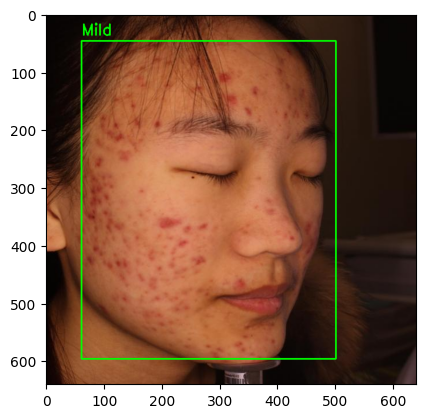

Acne Detected


In [ ]:
import cv2
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

def get_acne_remedies(severity):
    remedies = {
        "Mild": {
            "description": "Mild acne usually consists of blackheads and whiteheads. Here are some general recommendations:",
            "recommendations": [
                "Use a gentle cleanser to wash your face twice a day.",
                "Apply over-the-counter topical treatments with ingredients like benzoyl peroxide or salicylic acid.",
                "Keep your skin moisturized with a non-comedogenic moisturizer.",
                "Avoid picking or squeezing pimples to prevent scarring."
            ]
        },
        "Moderate": {
            "description": "Moderate acne involves more inflamed pimples. Consider the following recommendations:",
            "recommendations": [
                "Continue with a gentle cleanser and topical treatments.",
                "Consider using products with retinoids to help unclog pores.",
                "Consult a dermatologist for prescription medications like antibiotics or prescription-strength topicals.",
                "Maintain a healthy lifestyle, including a balanced diet and regular exercise."
            ]
        },
        "Severe": {
            "description": "Severe acne may include cysts and nodules. It often requires professional intervention. Consider the following recommendations:",
            "recommendations": [
                "Consult a dermatologist for a personalized treatment plan.",
                "Prescription medications, including oral antibiotics, hormonal treatments, or isotretinoin, may be recommended.",
                "Adopt a consistent skincare routine.",
                "Consider lifestyle changes, such as managing stress and avoiding certain foods that may trigger acne."
            ]
        }
    }

    return remedies.get(severity, {"description": "No specific recommendations for this severity level."})

def detect_faces(image):
    detector = MTCNN()
    faces = detector.detect_faces(image)
    return faces

def analyze_skin(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is not None:
        # Detect faces in the image
        faces = detect_faces(image)

        # Check if a face is detected
        if faces:
            print("Face Detected")
            acne_detected = False  # Flag to check if acne is detected

            # Loop through detected faces
            for i, face in enumerate(faces):
                x, y, width, height = face['box']

                # Extract the region of interest (ROI) containing the face
                face_roi = image[y:y+height, x:x+width]

                # Perform acne severity estimation (replace this with your severity estimation logic)
                # For demonstration purposes, we assume severity levels based on face size
                severity_level = i % 3

                # Add severity text
                severity = "Mild" if severity_level == 0 else "Moderate" if severity_level == 1 else "Severe"
                remedies_info = get_acne_remedies(severity)
                print(f"Severity Level: {severity}")
                print(remedies_info["description"])
                print("Recommendations:")
                for recommendation in remedies_info["recommendations"]:
                    print(f"- {recommendation}")

                # Draw a color-coded rectangle around the acne area with severity text
                color = (0, 255, 0)  # Green color
                if severity == "Moderate":
                    color = (0, 165, 255)  # Orange color
                elif severity == "Severe":
                    color = (0, 0, 255)  # Red color

                cv2.rectangle(image, (x, y), (x+width, y+height), color, 2)
                cv2.putText(image, f"{severity}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

                # Set the flag to True if acne is detected
                acne_detected = True

            # Display the image with rectangles
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()

            # Print a message based on acne detection
            if acne_detected:
                print("Acne Detected")
            else:
                print("No Acne Detected")

        else:
            print("No face Detected")

# Example usage
image_path = '/content/drive/MyDrive/acne_detection.v1i.tensorflow/train/train_acne/levle2_272_jpg.rf.8bbd4b41b4b01a7cd7740196c8c9dc0e.jpg'
analyze_skin(image_path)


----

### Convert and Save Model

In [ ]:
pip install Flask tensorflow


In [ ]:
import pickle

dump = {
    'acne':acneModel,
}
# Save your model to a file using pickle
with open("acneModel.pkl", "wb") as f:
    pickle.dump(dump, f)

In [ ]:
acneModel.save("acneModel")

In [ ]:
acneModel.save("'my_model.keras'")

In [ ]:
# prompt: save code to h5 file

acneModel.save('/content/drive/MyDrive/acne_detection.v1i.tensorflow/Acne_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/acne_detection.v1i.tensorflow/Acne_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('acne_model.tflite', 'wb') as f:
    f.write(tflite_model)
